### Introduction to Regression with Neural Networks in TensorFlow

There are many defination for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


### Creating data to view and fit



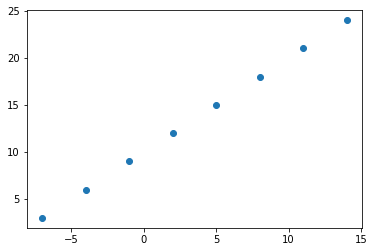

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create feature
X= np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom", "bathroom", "garage"])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy array into tensors
X=tf.cast(tf.constant(X), dtype=tf.float32)
y=tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

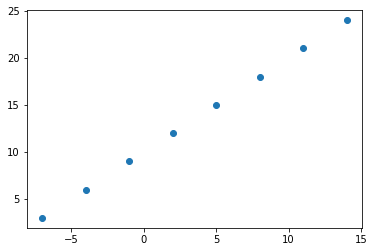

In [12]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - defines the input layers and output layers as well as the hidden layers of the deep learning model.
2. **Compiling a model** - defines the loss function (in other words, the function which tell our model how wrong it is) and the optimizer (tell our model how to improve the patterns its learning) and evalution matrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model to find a patterns between X & y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequantial API
model=tf.keras.Sequential([
  tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD id  sochasitic gradient descent 
              metrics=["mae"]) 

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 490ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# Checkout X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred+11

array([[23.71602]], dtype=float32)

## Improving our model

 we can improve our model, by altering the steps we took to crearte a model.
1. **Create a model** -here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **ecophs** (leave it training for longer) or on more data (give the model more example to learn from).

In [17]:
# Let's rebuild our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequantial API
model=tf.keras.Sequential([
  tf.keras.layers.Dense(1)                     
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD id  sochasitic gradient descent 
              metrics=["mae"]) 

# 3. Fit the model (this time we'll train for longer )
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 289ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

In [18]:
# Remind ourselves of data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [20]:
# Let's see if we can make another change to our model
# Create a model (this time with an extra hidden layer with 100 hidden units)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)                       
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 427ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2603 - mae: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5659 - mae: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8675 - mae: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 7ms/st

In [21]:
# Let's remind ourselves of data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's try to make a prediction
model.predict([17.0])

array([[26.434414]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> fit it -> evalute it -> tweak a model -> fit it -> evalute it -> tweak a model -> fit it -> evalute it...
```


 when it comes to evaluation, there are three words you should memorize
 > "visualize, visualize, visualize"

Its a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself- what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the prediction of the model line up against the ground truth(the original labels)?

In [23]:
# Make a bigger dataset

X =tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y= X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

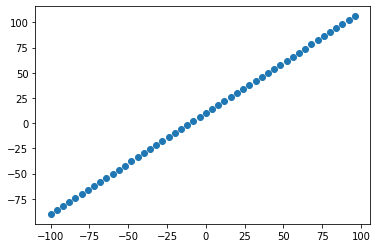

In [25]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically the 70-80% of the data you have available.
* **Valdiation set** - the model get tuned on this data, which is typically the 10-15% of tha data available.
* **Test set** - the model gets evaluted on this data to test what is has learned, this set is typically the 10-15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test data
X_train=X[:40] # first 40 are training samples(80% of the data)
y_train=y[:40]

X_test=X[40:] # last 10 are the testing samples(20% of the data)
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data into a training and test sets... let's visualize again!

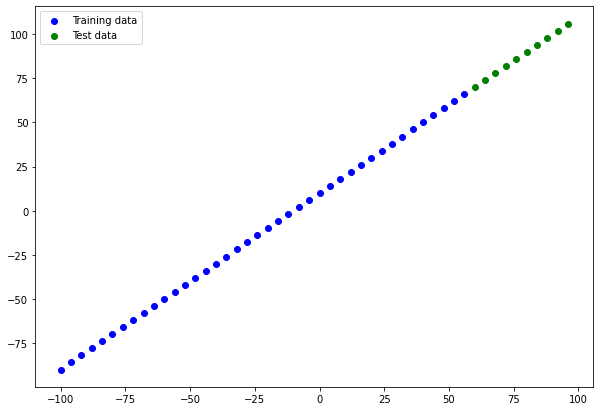

In [28]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
# show a legend
plt.legend();

In [29]:
# Let's have a look how to build a neaural network model for our data

#1. Create a model
model=tf.keras.Sequential([
   tf.keras.layers.Dense(1)                        
])

# 2.Create a compiler
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # fit the model
#model.fit(tf.expand_dims(X_tain), y_train, epochs=100)

### Visualizing the model

In [31]:
model.summary()

ValueError: ignored

In [32]:
# Lets create a model which build automatically by defining the input_shape argument in first layer
tf.random.set_seed(42)
#1. Create a model( same as above)
model=tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
   tf.keras.layers.Dense(1, name="output_layer")

], name="model_1")

# 2.Create a compiler(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameter in the model
* Trainable parameters - these are the parameters(patterns) model can update as it trains.
* Non-trainable params - these  paremeters are'nt updated during training ( this is typical when you bring in already learn pattern or parameters from other model during training **transfer learning**).

In [34]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [35]:
 # Get summary of our model
 model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


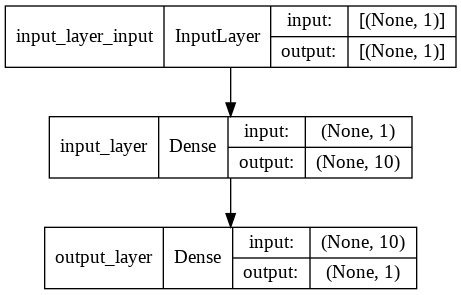

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions , it's good idea to plot them against the ground truth lables.

Often you'll see this in the form `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions).

In [37]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you are going to reuse some kind of  functionality in the future , it's good idea to turn into a function.

In [39]:
# Let's create a plotting function
def plot_predictions(train_data= X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compare predictions to the ground to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legend
  plt.legend();

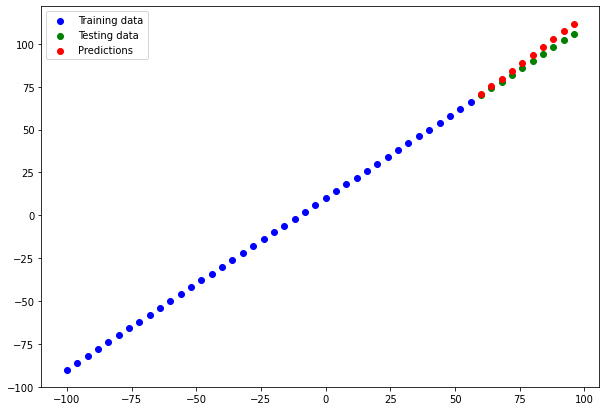

In [40]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

 ### Evaluting our model's predictions with regression evaluation matrics

 Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

since we're working on regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions.
*MSE - mean square error, "square the average erros". 



In [41]:
# Evalute the model on the test
model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 4ms/step - loss: 11.4961 - mae: 11.4961


[11.496147155761719, 11.496147155761719]

In [42]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [43]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [46]:
# calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [47]:
# Calculate the mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                  y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [48]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
   return tf.metrics.mean_absolute_error(y_true=y_test,
                                 y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
   return tf.metrics.mean_squared_error(y_true=y_test,
                                 y_pred=tf.squeeze(y_pred))

### Runing experiments to improve our model

```
Build a model -> fit it -> evalute it -> tweak a model -> fit it -> evalute it -> tweak a model -> fit it -> evalute it...
```
1. Get more data - get more example for your model to train on (more oppertunities to learn patterns or relationship between feature and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of chance to find patterns in the data.

Let's do 3 model experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers , trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`


In [49]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)                       
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

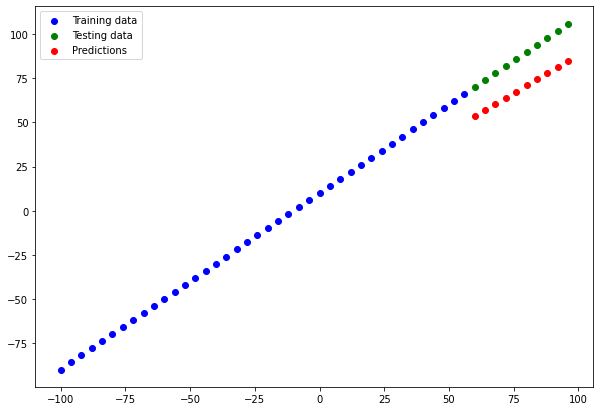

In [50]:
# Make a plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
# Calculate model_1 evalution metrics
mae_1 =mae(y_test, y_pred)
mse_1= mse(y_test, y_pred)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [52]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                       
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])
#3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

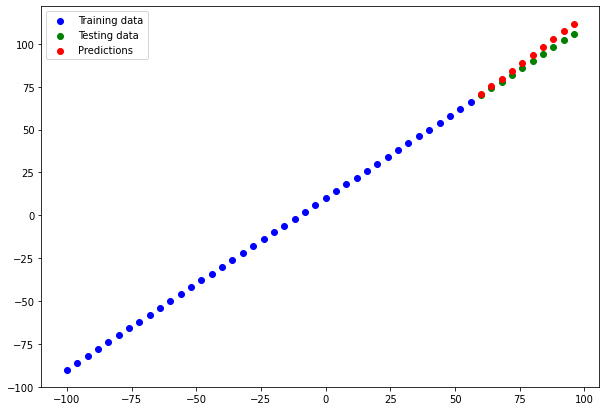

In [53]:
# Make and plot predictions of model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [54]:
# Calculate model_2 Evalutions matrics
mae_2=mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [55]:
# create a random seed
tf.random.set_seed(42)

#1. create a model
model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)                          
])

#2. compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 6ms/

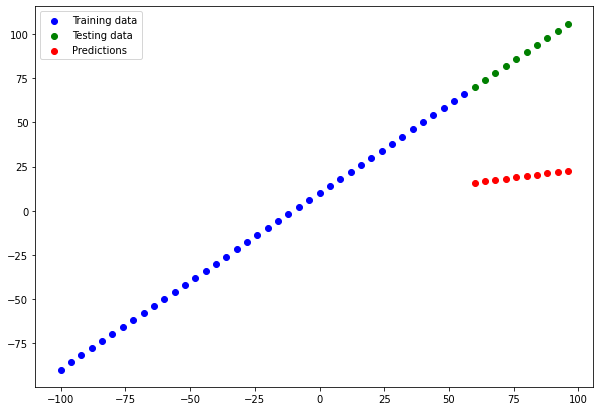

In [56]:
# Make and plot some predictions
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [57]:
# Calculate model_3 evalutions matrics
mae_3=mae(y_test, y_preds_3)
mse_3=mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**Note:** You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary.

In [58]:
# Let's compare our model's results using pandas Dataframe
import pandas as pd

model_results =[["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results=pd.DataFrame(model_results, columns=["model", mae, mse])  
all_results             

,model,<function mae at 0x7fba8ce0d320>,<function mse at 0x7fba8cdfc320>
0,model_1,3.196941,13.070143
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like `model_2`performed best..

In [59]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goal to minimize a time between your experiments. the more experiments you do, the more thing you'll figure out which dont work and in turn, get closer to figuiring out what does work. Remember the machine learning practioner's motto: "experiments, experiments, experiments".

## Tracking your experiments

one really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily there are tools to help us!

📚 ** Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of a TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights & Biases - a tool for tracking all kinds of machine learning experiments(plugs straight into TensorBoard)


## Saving our models

Saving our model allow us to use them outside of Google Colab(or whereever they were trained) such as in web application in or a mobile app.

There are two main formats we can save our model's too:

1.The SavedModel format

2.The HDF5 format

In [60]:
# Save model using the savemodel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [61]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in saved model

In [62]:
# Load in the savemodel format model
loaded_SavedModel_format=tf.keras.models.load_model("/content/best_model_SaveModel_format")
loaded_SavedModel_format.summary()

OSError: ignored

In [ ]:
model_2.summary()

In [ ]:
# Compare model_2 predictions with savedmodel format model predictions
model_2_preds=model_2.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)
model_2_preds==loaded_SavedModel_format_preds

In [63]:
#compare the MAE of the model_2 preds and loaded_savedmodel_preds
mae(y_true=y_test, y_pred=model_2_preds)== mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)


NameError: ignored

In [64]:
# Load in model using .h5 format
loaded_h5_model=tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Check to see if model .h5 match the predictions of model_2
model_2_preds=model_2.predict(X_test)
loaded_h5_model_preds=loaded_h5_model.predict(X_test)
model_2_preds==loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model( or any other file) from Google Colab

if you want to downlaod your files from Google Colab:

1.you can go to the "files" tab and right click on the file you're after and click "download".

2.use code(see the cell below)

3.save it to Google Drive by connecting Google Drive and copying it there(see the 2nd cell below)

In [67]:
# download a file from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# Save file from Google Colab to Google Drive (requires mounting drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

## A larger example

In [69]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [71]:
# Read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
# Lets try out one-hot encode our Dataframe so its all numbers
insurance_one_hot=pd.get_dummies(insurance) 
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [80]:
# create x and y values (feature and labels)
X = insurance_one_hot.drop("charges", axis=1)
y= insurance_one_hot["charges"]

In [81]:
# view x
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [79]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [83]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [86]:
# Build a neural network (as like model 2)

#create a randm set
tf.random.set_seed(42)

#1. create a model
insurance_model=tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)                                
])

# 2. compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [87]:
# Check the results of insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [88]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now it look like our model is not performing too well... let's try and improve it

To (try) improve our model, we'll run 2 experiments:

1.Add an extra layers with more hidden units and use the Adam optimizer

2.Same as above but train for longer(200 epochs)

3.(insert your own experiment here)

In [90]:
# Set random seed
tf.random.set_seed(42)

# 1. Creata a model
insurance_model_2=tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)                                 
])

# 2. Compile a model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit a model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [91]:
# Evaluate a larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [94]:
# set random seed
tf.random.set_seed(42)

#1 Create a model
insurance_model_3=tf.keras.Sequential([
       tf.keras.layers.Dense(100),
       tf.keras.layers.Dense(10),
       tf.keras.layers.Dense(1)                                
])

#2. Compile a model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
#3. Fit the model
history=insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [95]:
# Evaluate our 3 model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

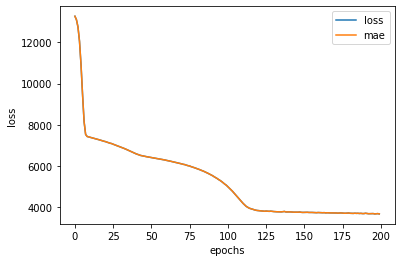

In [98]:
# Plot history ( also known as loss curve or a training curvre)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question:** How long should you train for?

it depends. Really...it depends on the problem you are working on.However many people asked this question before... so TensorFlow has a solution! its called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) , which is a TensorFlow component you can add to your model to stop training once its stops improving a certain metric.

## Preprocessing Data(normalization and standardization)

In terms of scaling value, neural network tends to perform normalization.

If you're not sure which to use, you could try both and see which perform best.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance DataFrame
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
 
# create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(), ["age","bmi", "children"]), # turn all values in these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x and y
X=insurance.drop("charges", axis=1)
y=insurance["charges"]

#Build our train and test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2 , random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [110]:
# What does our data look like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [111]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [112]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [118]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)
#1. Create a model
insurance_model_4=tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)                               
])
#2. compile a model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3 Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [120]:
# Evalute our insurance model trained on normalizes data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

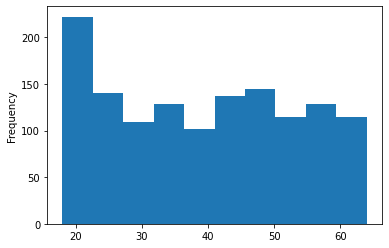

In [100]:
X["age"].plot(kind="hist")

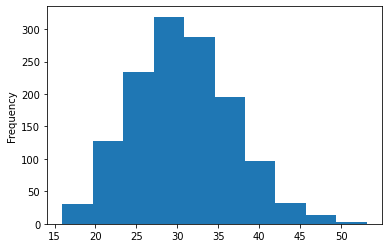

In [101]:
X["bmi"].plot(kind="hist")

In [104]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64